# Investment plan based on similarity of two cities(New York and L.A.)

## Part 1:A description of the problem and a discussion of the background.

### Problem description: 
### **To invest new restaurant in L.A., how to evaluate the plan based on experience in New York.**

### Discussion:
### Background:
L.A. and New York are two cities which have multiple culture, huge diversity and population composition. 
The population of L.A. is smaller than New York City based on Wikipedia. 
L.A locates in the western side of U.S but New York City locates in the eastern side.
People's preference in these cities should be different but how can we guage the difference or how similar they are in some place?

* Explore what kind of venue can be invested in the similar neighborhood <br>
### How to evaluate the plan:
* find the most popular venue in every area and map into L.A. 
* find the connection, distribution or similarity of two areas


### Data Overview
* Geospatial data from the website: define the center location of postal code 

New York: https://geo.nyu.edu/catalog/nyu_2451_34572 <br>
L.A.:http://boundaries.latimes.com/sets/ 

Neighborhood data and its geospatial information.

https://en.wikipedia.org/wiki/File:LA_County_Incorporated_Areas_Los_Angeles_highlighted.svg <br>
https://en.wikipedia.org/wiki/File:Map_of_New_York_Economic_Regions.svg
* Foursquare venue data: get a variety of venue in every area
https://foursquare.com/ <br>
different kind of venues like gym, restaurant, theater..etc
But here we probably only use restaurant category

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
# uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [2]:
with open('nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [3]:
neighborhoods_data = newyork_data['features']

In [4]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [5]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [6]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [7]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [8]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#46cc31',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
#map_newyork

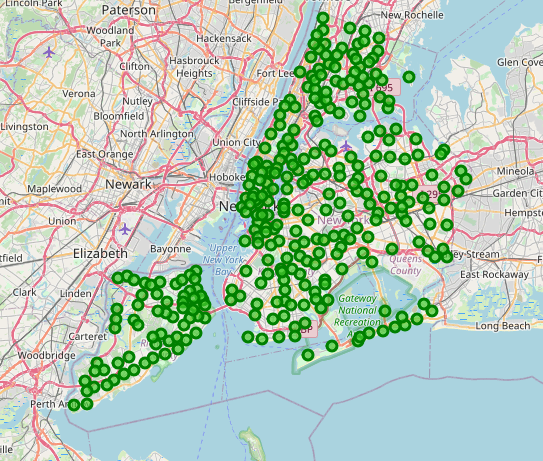

In [9]:
with open('la-county-neighborhoods-current.geojson') as json_data:
    la_data = json.load(json_data)

In [10]:
# define the dataframe columns
column_names = [ 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
la_neighborhood = pd.DataFrame(columns=column_names)
LA_data = la_data['features']

In [11]:
for data in LA_data:
    #borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates'][0][0]
    tmp_lat = [];tmp_lon = []
    for j in range(len(neighborhood_latlon)):
        tmp_lat.append(neighborhood_latlon[j][1])
        tmp_lon.append(neighborhood_latlon[j][0])
        
    neighborhood_lat = np.median(tmp_lat)
    neighborhood_lon = np.median(tmp_lon)
    
    la_neighborhood = la_neighborhood.append({'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [12]:
la_neighborhood.head() # directly use neighborhood instead of adding borough in L.A.

,Neighborhood,Latitude,Longitude
0,Acton,34.495903,-118.167026
1,Adams-Normandie,34.036812,-118.305408
2,Agoura Hills,34.136276,-118.728825
3,Agua Dulce,34.488235,-118.311001
4,Alhambra,34.084436,-118.135698


In [13]:
address = 'Los angeles City, LA'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map using latitude and longitude values
map_la = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(la_neighborhood['Latitude'], la_neighborhood['Longitude'], la_neighborhood['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#46cc31',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)  
    
#map_la

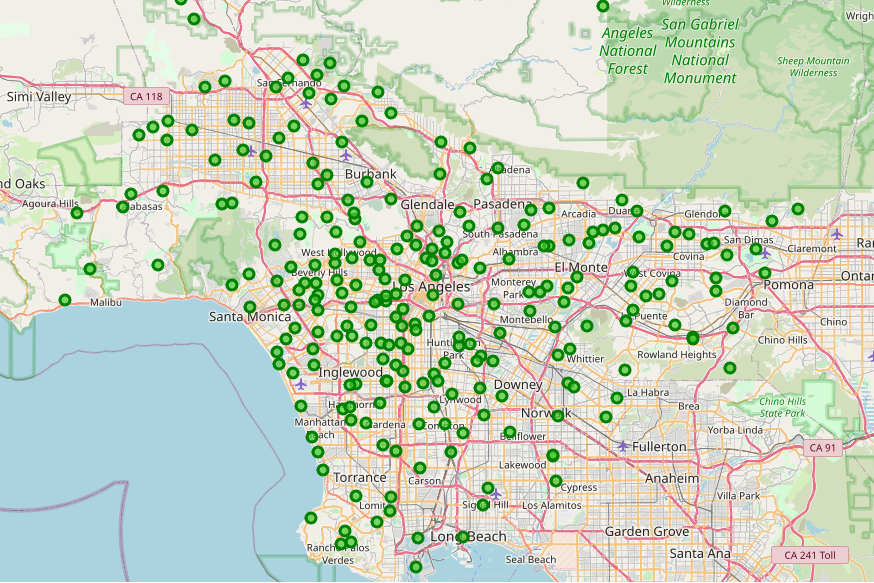